In [31]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df=pd.read_csv('DatosLimpios.csv')

In [3]:
zonas=pd.read_csv('clusters.csv')

In [4]:
df=df.merge(zonas,left_on='dr_no',right_on='dr_no')

In [5]:
df=df.set_index('dr_no')

In [6]:
for i in range(5):
    temp=df[df.zonas==i]
    print(100*temp.status.value_counts()/len(temp))
    #print(temp.date_occ.value_counts())

IC    81.205125
AO    10.608220
AA     7.758241
JA     0.311602
JO     0.116812
Name: status, dtype: float64
IC    75.380312
AO    12.896385
AA    11.222343
JA     0.258829
JO     0.242131
Name: status, dtype: float64
IC    75.852680
AO    13.015991
AA    10.440684
JA     0.428996
JO     0.261648
Name: status, dtype: float64
IC    84.994033
AO     7.677873
AA     6.942924
JA     0.252664
JO     0.132505
Name: status, dtype: float64
IC    74.961381
AO    12.761099
AA    11.767076
JA     0.406340
JO     0.104104
Name: status, dtype: float64


In [7]:
for i in range(5):
    temp=df[df.zonas==i]
    print(temp.date_occ.value_counts())

2022-12-02    600
2022-10-01    540
2022-04-01    537
2022-05-01    529
2022-10-02    527
             ... 
2020-03-21    198
2023-02-26    197
2021-01-24    193
2020-12-29    191
2023-02-27     73
Name: date_occ, Length: 1154, dtype: int64
2020-01-01    211
2022-11-01    206
2022-06-03    205
2023-02-02    199
2021-01-01    197
             ... 
2020-04-04     64
2020-03-19     63
2023-02-25     58
2023-02-26     57
2023-02-27     19
Name: date_occ, Length: 1154, dtype: int64
2022-12-02    141
2020-01-01    140
2023-02-03    127
2022-08-02    116
2022-08-01    115
             ... 
2021-03-14     37
2023-02-26     35
2020-10-07     35
2023-02-25     26
2023-02-27     14
Name: date_occ, Length: 1154, dtype: int64
2020-05-30    418
2022-04-01    169
2022-10-01    164
2022-10-02    161
2022-08-01    159
             ... 
2023-02-24     60
2023-02-25     58
2020-03-24     58
2023-02-26     53
2023-02-27     23
Name: date_occ, Length: 1154, dtype: int64
2022-12-02    63
2022-07-02    54
20

In [8]:
for i in range(5):
    temp=df[df.zonas==i]
    print((100*temp.vict_descent.value_counts()/len(temp))[0:7])

H    35.359611
B    19.513485
U    13.655434
W    12.340835
X     9.916825
O     4.904899
A     2.273561
Name: vict_descent, dtype: float64
H    37.278951
W    24.168824
U    14.260666
O    12.017200
B     6.843116
X     3.156049
A     1.403523
Name: vict_descent, dtype: float64
W    32.007385
H    24.483345
O    12.071668
U    11.314615
X     9.229400
B     6.890506
A     2.427881
Name: vict_descent, dtype: float64
W    33.603555
H    14.380478
B    14.020822
X    12.368215
U    10.976503
O     9.986420
A     2.704415
Name: vict_descent, dtype: float64
H    36.946739
U    16.139432
W    15.729733
X    12.069313
B    10.826785
O     5.648465
A     1.437303
Name: vict_descent, dtype: float64


In [9]:
for i in range(5):
    temp=df[df.zonas==i]
    print((100*temp.vict_sex.value_counts()/len(temp))[0:7])

M    39.309217
F    37.702893
X    22.971684
H     0.016207
Name: vict_sex, dtype: float64
M    45.689238
F    37.506888
X    16.792185
H     0.011689
Name: vict_sex, dtype: float64
M    47.289221
F    36.297349
X    16.410774
H     0.002656
Name: vict_sex, dtype: float64
M    42.106909
F    34.948356
X    22.938974
H     0.005761
Name: vict_sex, dtype: float64
F    37.910538
M    34.206461
X    27.872926
H     0.010075
Name: vict_sex, dtype: float64


In [11]:
clusters = pickle.load(open('model_cluster.sav', 'rb'))

In [12]:
centroides=clusters.cluster_centers_

In [13]:
x=[i[1] for i in centroides]
y=[i[0] for i in centroides]

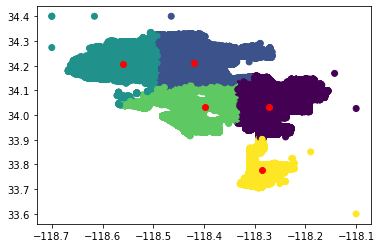

In [14]:
plt.scatter(df.lon,df.lat,c=df.zonas)
plt.scatter(x,y,c='r')
plt.show()

In [18]:
for i in range(5):
    temp=df[df.zonas==i]
    print(i)
    print(temp.lon.min(),temp.lat.min())
    print(temp.lon.max(),temp.lat.max())

0
-118.335 33.9067
-118.1 34.16884813
1
-118.4907 34.114
-118.2658 34.4
2
-118.7 34.0414
-118.4895 34.4
3
-118.5633 33.9165
-118.3347883 34.1301
4
-118.3289 33.6
-118.1 33.9069


In [51]:
for i in range(5):
    temp=df[df.zonas==i]
    print(i)
    temp=temp.date_occ.value_counts().sort_index()
    img=px.line(temp, y =temp.values , x = temp.index)
    img.show()

0


1


2


3


4


In [21]:
df.columns

Index(['date_rptd', 'date_occ', 'time_occ', 'area', 'rpt_dist_no', 'part_1_2',
       'crm_cd', 'mocodes', 'vict_age', 'vict_sex', 'vict_descent',
       'premis_cd', 'weapon_used_cd', 'status', 'lat', 'lon', 'crm_cd_concat',
       'ucr', 'premis', 'zonas'],
      dtype='object')

In [40]:
df.date_occ.sort_index().values

array(['2020-09-19', '2021-04-05', '2022-12-19', ..., '2023-01-12',
       '2023-01-25', '2023-01-26'], dtype=object)

In [ ]:
#mayo 30 protestas george floyd
#3 es verde claro

In [48]:
df_ts=df.date_occ.value_counts().sort_index()
img=px.line(df_ts, y =df_ts.values , x = df_ts.index)
img.show()

In [50]:
df_ts=df.date_rptd.value_counts().sort_index()
img=px.line(df_ts, y =df_ts.values , x = df_ts.index)
img.show()

In [49]:
df.columns

Index(['date_rptd', 'date_occ', 'time_occ', 'area', 'rpt_dist_no', 'part_1_2',
       'crm_cd', 'mocodes', 'vict_age', 'vict_sex', 'vict_descent',
       'premis_cd', 'weapon_used_cd', 'status', 'lat', 'lon', 'crm_cd_concat',
       'ucr', 'premis', 'zonas'],
      dtype='object')